# **Dataset Information:** 

The dataset for this project consists of comments from the online platform Rediff related to the IsraelPalestine conflict. It includes information such as comment ID, score (indicating popularity or agreement with the comment), the comment text itself, subreddit (if applicable), and the comment's creation time. This dataset is valuable for sentiment analysis and understanding public opinion about the ongoing conflict. 

The dataset contains the following variables: 

* **Comment ID:** A unique identifier for each comment. 

* **Score:** The score or popularity of the comment within the platform. 

* **Comment Text:** The textual content of the comment. 

* **Subreddit:** The subreddit (if available) to which the comment belongs. 

* **Created Time:** The timestamp indicating when the comment was posted. 

# Import necessary libraries

In [1]:
# Import necessary libraries and modules for data analysis, visualization, and machine learning.
import re  # Regular expressions for text cleaning
import nltk  # Natural Language Toolkit for text processing
import numpy as np  #NumPy library for numerical operations
import pandas as pd  #Data manipulation and analysis
import seaborn as sns  #Statistical data visualization
from textblob import TextBlob  # Sentiment analysis and text processing
import matplotlib.pyplot as plt  #Creating static, animated, and interactive visualizations
from wordcloud import WordCloud  # Generating word clouds for text visualization
from nltk.corpus import stopwords  # Common words to be removed from text
from sklearn.linear_model import LogisticRegression  # Machine learning model
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.feature_extraction.text import TfidfVectorizer  # Text data vectorization
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report  # Model evaluation metrics

In [2]:
# Disable warnings to suppress potential runtime warning messages
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
# Read the CSV file "pls_isl_conflict_comments.csv" into a DataFrame using pandas.
df=pd.read_csv("pls_isl_conflict_comments.csv",encoding='latin1',error_bad_lines=False,warn_bad_lines=False)
# Display the First Few Rows of the Dataset
df.head()

,comment_id,score,self_text,subreddit,created_time
0,k5480sx,1,Exactly! I can remember the humanitarian aid s...,worldnews,16-10-2023 19:39
1,k547q14,1,*We are the only part of the World that has Fr...,Palestine,16-10-2023 19:36
2,k547elf,1,"I dont make Israeli strategy, nor am I Israel...",worldnews,16-10-2023 19:34
3,k54742r,1,These people didn't vote Hamas in or something...,worldnews,16-10-2023 19:32
4,k5473zi,1,We don't care what you do. We just want to liv...,worldnews,16-10-2023 19:32


The code reads a CSV file into a DataFrame, handling encoding and ignoring lines with parsing errors to load the data successfully.

In [4]:
# Print the shape of the 'df' DataFrame to show the number of rows and columns.
df.shape

(1359053, 5)

# Data Preprocessing

In [5]:
# Convert the 'score' column in the DataFrame to numeric values
df['score'] = pd.to_numeric(df['score'], errors='coerce')

In [6]:
# Convert the 'created_time' column to datetime format using pd.to_datetime()
df['created_time']=pd.to_datetime(df['created_time'], errors='coerce')

In [7]:
# Check and display the data types of all columns in the DataFrame
df.dtypes

comment_id              object
score                  float64
self_text               object
subreddit               object
created_time    datetime64[ns]
dtype: object

In [8]:
# The 'count()' function is used to count values for each column in the DataFrame.
df.count()

comment_id      1359028
score            664659
self_text        730294
subreddit        254711
created_time     189322
dtype: int64

In [9]:
# Check for Missing Values
df.isnull().sum()

comment_id           25
score            694394
self_text        628759
subreddit       1104342
created_time    1169731
dtype: int64

In [10]:
# Drop rows with missing values in the DataFrame 'df'.
df.dropna(inplace=True)

In [11]:
# Check and verify that there are no more missing values in the DataFrame.
df[df.isnull()].count()

comment_id      0
score           0
self_text       0
subreddit       0
created_time    0
dtype: int64

In [12]:
# Check for Duplicates
df[df.duplicated()].count()

comment_id      0
score           0
self_text       0
subreddit       0
created_time    0
dtype: int64

# Some Basic Infromation about the Dataset

In [13]:
# Display information about the structure and characteristics of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189321 entries, 0 to 1359052
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   comment_id    189321 non-null  object        
 1   score         189321 non-null  float64       
 2   self_text     189321 non-null  object        
 3   subreddit     189321 non-null  object        
 4   created_time  189321 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 8.7+ MB


In [14]:
# Generate a statistical summary of the dataset to display statistics for each column as rows, making it easier to analyze the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,189321.0,28.613191,180.086547,-934.0,1.0,2.0,10.0,16463.0


In [15]:
# Generate summary statistics for both numeric and non-numeric data types.
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
comment_id,189321,189321,k5480sx,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,189321.0,NaN,NaN,NaN,NaT,NaT,28.613191,180.086547,-934.0,1.0,2.0,10.0,16463.0
self_text,189321,186026,your comment has been removed for having a low...,104,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subreddit,189321,14,IsraelPalestine,52533,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_time,189321,13562,2023-10-14 21:24:00,68,2023-07-10 01:42:00,2023-12-10 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Remove Outliers

In [16]:
# Function to remove outliers using the IQR method
def remove_outliers(data, col):
    Q1, Q3 = data[col].quantile([0.25, 0.75])  # Calculate 1st and 3rd quartiles
    IQR = Q3 - Q1  # Calculate the interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound
    upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound
    # Replace outliers with bounds
    return np.where(data[col] < lower_bound, lower_bound, np.where(data[col] > upper_bound, upper_bound, data[col]))

# Apply remove_outliers function to the 'score' column in the DataFrame
df['score']= remove_outliers(df, 'score')

This DataFrame contains a column named 'score' that has a wide range of values, some of which are outliers. These outliers can distort statistical measures and visualizations. To address this issue, we use the Interquartile Range (IQR) method to identify and replace outliers. The 'remove_outliers' function calculates the IQR, defines lower and upper bounds, and replaces values outside these bounds with the respective limits. This ensures a more accurate and reliable analysis by reducing the impact of extreme values in the 'score' column.

# Exploratory Data Analysis (EDA)

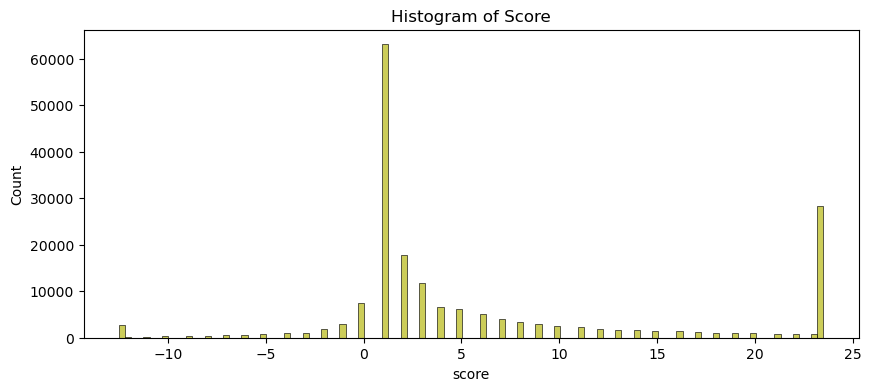

In [17]:
# Plot a histogram of the 'score' column
plt.figure(figsize=(10,4))
sns.histplot(df['score'], bins='auto',kde=False, color='tab:olive')
plt.title("Histogram of Score")
plt.show()

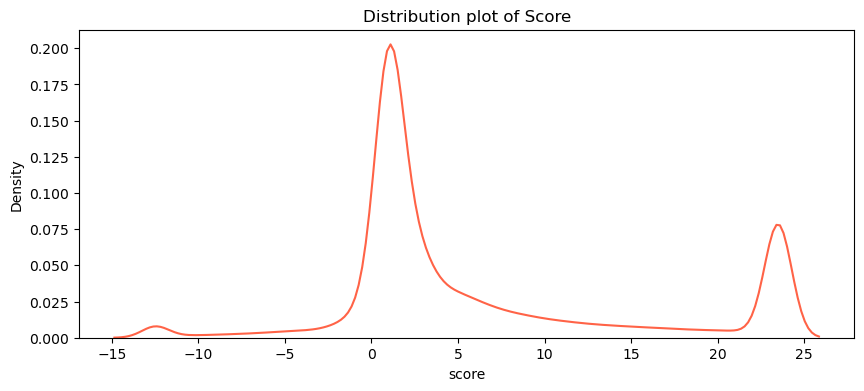

In [18]:
# Plot a distribution plot (Kernel Density Estimate) of the 'score' column
plt.figure(figsize=(10,4))
sns.distplot(df['score'],hist=False,color='tomato')
plt.title("Distribution plot of Score")
plt.show()

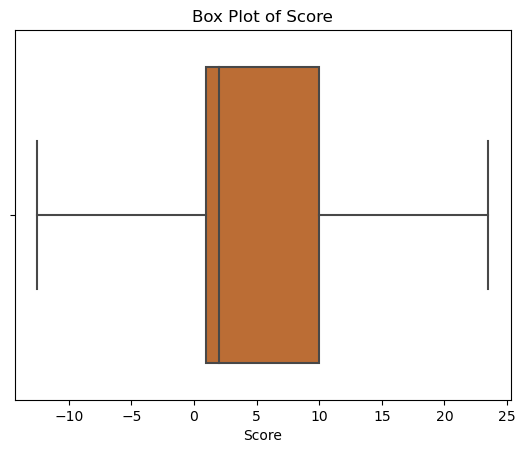

In [19]:
# Plot a box plot of the 'score' column
sns.boxplot(x='score',data=df,color='chocolate')
plt.title('Box Plot of Score')
plt.xlabel('Score')
plt.show()

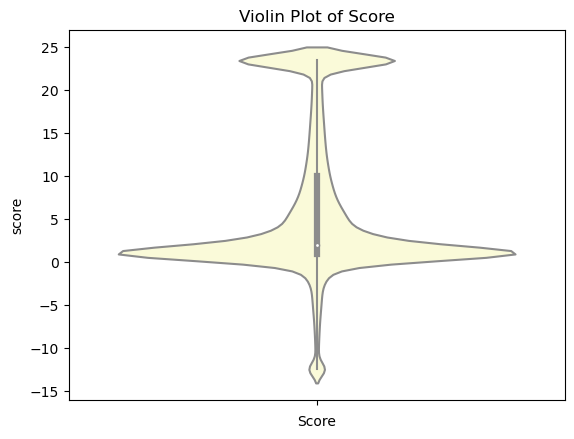

In [20]:
# Plot a violin plot of the 'score' column
sns.violinplot(y='score',data=df,color='xkcd:eggshell')
plt.title('Violin Plot of Score')
plt.xlabel('Score')
plt.show()

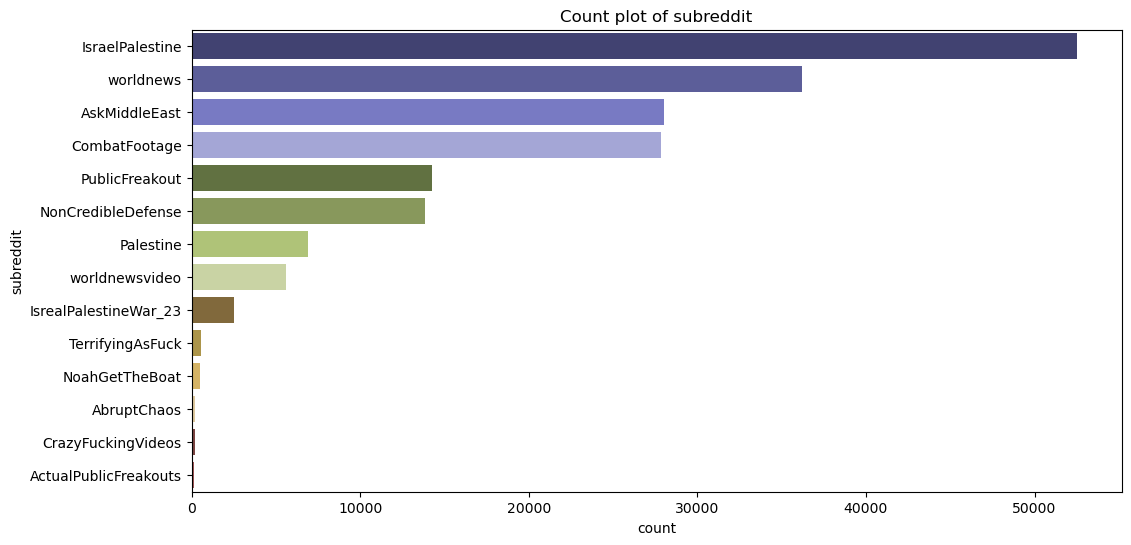

In [21]:
# Plot a count plot of the 'subreddit' column
plt.figure(figsize=(12,6))
sns.countplot(y=df['subreddit'],data=df,order=df['subreddit'].value_counts().index,palette='tab20b')
plt.title("Count plot of subreddit")
plt.show()

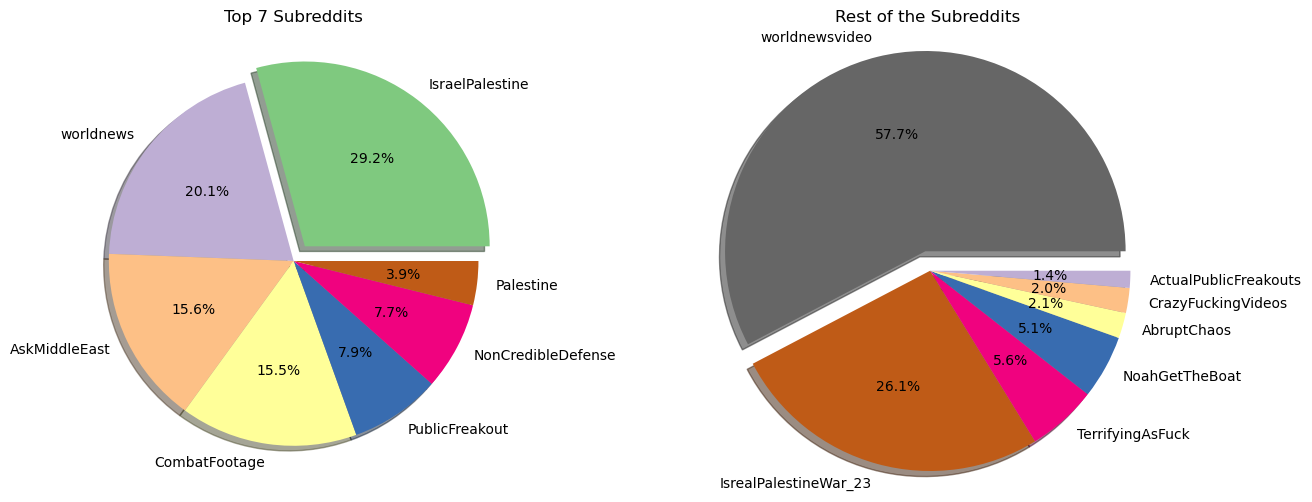

In [22]:
# Extract the counts of the top 7 subreddits and the remaining subreddits (8th and onwards)
subreddit_counts_top7 = df['subreddit'].value_counts()[:7]
subreddit_counts_rest = df['subreddit'].value_counts()[7:]

# Define colors for the pie charts
colors_top7 = plt.cm.Accent(range(len(subreddit_counts_top7)))
colors_rest = plt.cm.Accent_r(range(len(subreddit_counts_rest)))

# Plotting subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Top 7 subreddits
axs[0].pie(subreddit_counts_top7, labels=subreddit_counts_top7.index, autopct='%1.1f%%',explode=(0.1,0,0,0,0,0,0),shadow=True,colors=colors_top7)
axs[0].set_title('Top 7 Subreddits')

# Subplot 2: Rest of the subreddits
axs[1].pie(subreddit_counts_rest, labels=subreddit_counts_rest.index, autopct='%1.1f%%',explode=(0.1,0,0,0,0,0,0),shadow=True,colors=colors_rest)
axs[1].set_title('Rest of the Subreddits')

# Set equal aspect ratio for both subplots
plt.axis('equal')
# Display the pie charts
plt.show()

# Clean and Preprocess the Text Data

In [23]:
# Clean and preprocess the text data
def preprocess_text(text):
    r=text
    if type(text) == float:
        return ""
    r=r.lower()
    r=re.sub("'","",r) #This is to avoid removing contraction in english
    r=re.sub("@[A-Za-z0-9_]+","",r)
    r=re.sub("#[A-Za-z0-9_]+","",r)
    r=re.sub(r'http\S+','',r)
    r=re.sub('\[()!?]',' ',r)
    r=re.sub('\[.*?\]',' ',r)
    r=re.sub("[^a-z0-9]"," ",r)
    r=r.split()
    stopwords=["for","on","an","a","of","and","in","the","to","from"]
    r=[w for w in r if not w in stopwords]
    r=" ".join(word for word in r)
    return r

df['processed_text'] = df['self_text'].apply(preprocess_text)

The provided code defines a `preprocess_text` function to clean and preprocess text data, specifically applied to the 'self_text' column of a DataFrame (`df`). The function performs several text transformations, including converting text to lowercase, removing special characters, URLs, and certain stopwords. The cleaned text is then assigned to a new column named 'processed_text' in the DataFrame, applying the preprocessing function to each element in the 'self_text' column. The goal is to prepare the text data for further analysis or natural language processing tasks by eliminating noise and irrelevant information.

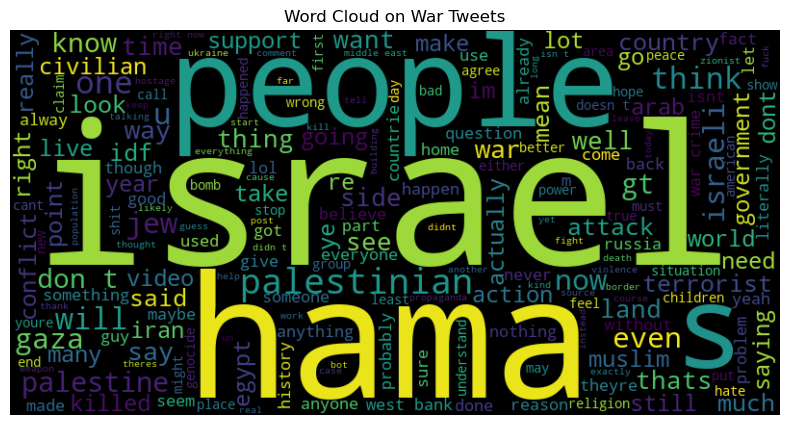

In [24]:
# Combine all processed text data into a single string
text_corpus = ' '.join(df['processed_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_corpus)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud on War Tweets')
plt.axis("off")
plt.show()

# Sentiment Analysis

In [25]:
# Sentiment Analysis
def analyze_sentiment(text):
    # Create a TextBlob object to analyze sentiment
    analysis = TextBlob(text)

    # Determine sentiment based on polarity
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis function to each text and create a 'sentiment' column
df['sentiment'] = df['processed_text'].apply(analyze_sentiment)

The provided code performs sentiment analysis on text data using the TextBlob library. The function `analyze_sentiment` takes a text input, creates a TextBlob object, and determines sentiment based on the polarity of the text. If the polarity is positive (>0), it returns 'Positive'; if negative (<0), it returns 'Negative'; otherwise, it returns 'Neutral'. This sentiment analysis function is then applied to each text in the 'processed_text' column of the DataFrame (`df`), and the results are stored in a new 'sentiment' column. The 'sentiment' column categorizes each text as Positive, Negative, or Neutral based on the sentiment analysis results.

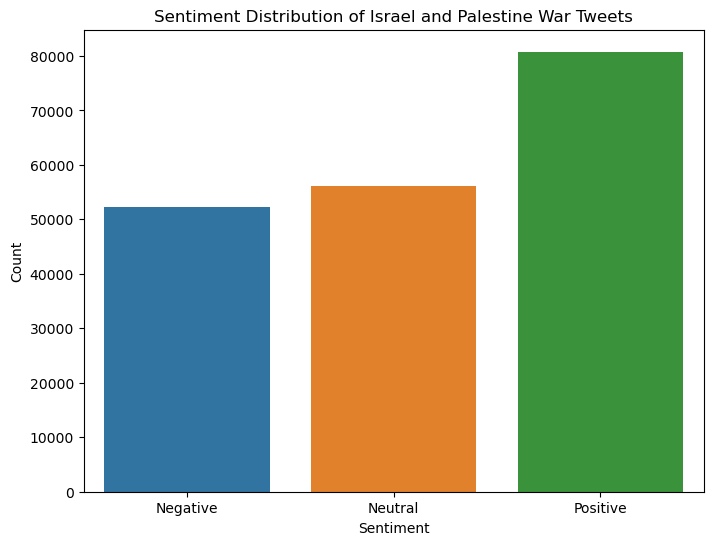

In [26]:
# Create a countplot to visualize the distribution of sentiments
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution of Israel and Palestine War Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [27]:
# Split the dataset into training and testing sets
xtrain,xtest,ytrain,ytest=train_test_split(df['processed_text'],df['sentiment'], test_size=0.2, random_state=42)

In [28]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xtest_tfidf = tfidf_vectorizer.transform(xtest)

# Logistic Regression Model

In [29]:
# Create an instance of the LogisticRegression model with a specified maximum number of iterations
lr=LogisticRegression(max_iter=1000)
# Fit (train) the Logistic Regression model using the TF-IDF-transformed training data
lr.fit(xtrain_tfidf, ytrain)

LogisticRegression(max_iter=1000)

In [30]:
# Make predictions on the test set
pred = lr.predict(xtest_tfidf)
pred[:30]

array(['Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral',
       'Negative', 'Negative', 'Positive', 'Neutral', 'Neutral',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Neutral', 'Positive', 'Neutral', 'Positive'],
      dtype=object)

In [31]:
# Calculate and print training and testing accuracy
train=lr.score(xtrain_tfidf,ytrain)
test=lr.score(xtest_tfidf,ytest)
print(train)
print(test)

0.9327197337840692
0.9223293278753466


# Model Evaluation

In [32]:
# Evaluate the model
accuracy=accuracy_score(ytest,pred)
matrix=confusion_matrix(ytest,pred)
report=classification_report(ytest,pred)

print(f' Accuracy: {accuracy:.2%}')
print('----'*20)
print(f' Matrix:\n {matrix}')
print('----'*20)
print(f' Report:\n {report}')
print('----'*20)

 Accuracy: 92.23%
--------------------------------------------------------------------------------
 Matrix:
 [[ 8848   384  1158]
 [  113 11022   186]
 [  743   357 15054]]
--------------------------------------------------------------------------------
 Report:
               precision    recall  f1-score   support

    Negative       0.91      0.85      0.88     10390
     Neutral       0.94      0.97      0.95     11321
    Positive       0.92      0.93      0.92     16154

    accuracy                           0.92     37865
   macro avg       0.92      0.92      0.92     37865
weighted avg       0.92      0.92      0.92     37865

--------------------------------------------------------------------------------


# **Conclusion:**

The sentiment analysis model, trained using Logistic Regression on TF-IDF-transformed text data, demonstrates strong performance with an accuracy of 92.23%. This high accuracy indicates the model's effectiveness in correctly classifying sentiment across three categories: Negative, Neutral, and Positive.

**Confusion Matrix:**
    The confusion matrix provides insights into the model's performance across individual classes. Notably, the model exhibits good precision and recall across all sentiment classes, with a slightly lower precision for Negative sentiment. The matrix reveals that the model is particularly adept at correctly identifying instances of Neutral sentiment.

```
               Predicted
               | Negative | Neutral | Positive |
Actual Negative|   8848   |   384   |  1158    |
Actual Neutral |   113    |  11022  |   186    |
Actual Positive|   743    |   357   |  15054   |
```

**Classification Report:**
    The classification report provides a detailed overview of the model's performance, including precision, recall, and F1-score for each sentiment class. The high precision, recall, and F1-score values for Neutral sentiment indicate the model's robustness in handling this category. Overall, the model demonstrates balanced performance across all classes, as reflected by the macro and weighted averages.

```
               precision    recall  f1-score   support
    Negative       0.91      0.85      0.88     10390
     Neutral       0.94      0.97      0.95     11321
    Positive       0.92      0.93      0.92     16154

    accuracy                           0.92     37865
   macro avg       0.92      0.92      0.92     37865
weighted avg       0.92      0.92      0.92     37865
```

In summary, the model's high accuracy, supported by a detailed analysis in the confusion matrix and classification report, underscores its capability to effectively classify sentiment in the given dataset. The balanced performance across all classes suggests that the model generalizes well and is a reliable tool for sentiment analysis tasks.